<a href="https://colab.research.google.com/github/P4RTH4-ROY/titanic_challenge/blob/main/titanic_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('/content/drive/MyDrive/Dataset for Colab/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset for Colab/titanic/test.csv')

# Display first 5 rows
print("Training Data:")
display(train.head())

# Check missing values
print("\nMissing Values in Training Data:")
print(train.isnull().sum())

Training Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


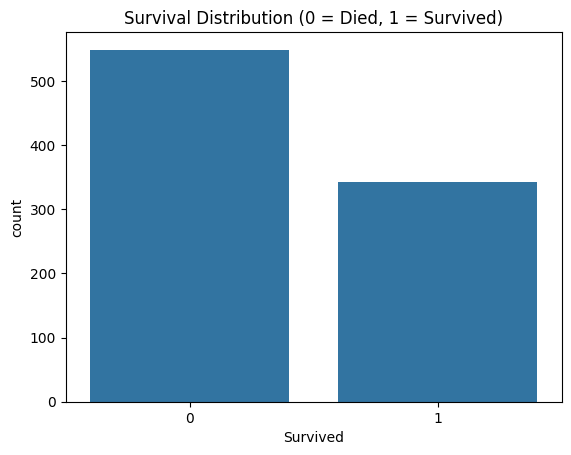

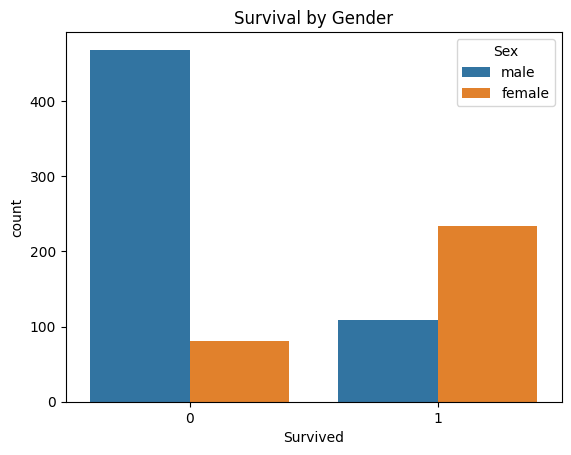

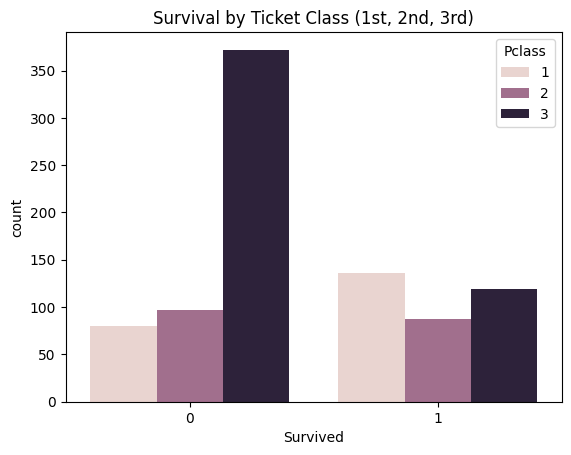

In [ ]:
# Survival count
sns.countplot(x='Survived', data=train)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title("Survival by Ticket Class (1st, 2nd, 3rd)")
plt.show()

In [ ]:
# Fill missing Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing Embarked with mode (most common value)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

<ipython-input-4-cb35cfafa943>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-4-cb35cfafa943>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# Extract titles from names (Mr, Mrs, Miss, etc.)
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Family size (SibSp + Parch + 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
# Convert Sex to binary (male=0, female=1)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked (S, C, Q)
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [ ]:
# Features to use
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X_train = train[features]
y_train = train['Survived']
X_test = test[features]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
#download the csv file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

In [ ]:
#optional if want to submit directly to kaggle
!kaggle competitions submit -c titanic -f submission.csv -m "My submission message"
# View your submissions
!kaggle competitions submissions -c titanic